In [17]:
# library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# dataset
df = pd.read_excel('1_prima_viz.xlsx')
db_to_df = pd.DataFrame(df)
db_to_df.head()

,id,Informazioni cronologiche,Genere,Età,Utile,Chiara,Informativa,Bella,Intuitiva,Valore complessivo
0,Persona 1,2021/06/07 2:21:59 PM EET,Donna,22,1,2,3,1,2,3
1,Persona 2,2021/06/07 2:38:10 PM EET,Donna,22,6,6,6,5,5,5
2,Persona 3,2021/06/07 2:45:40 PM EET,Donna,52,5,6,6,5,5,5
3,Persona 4,2021/06/07 2:52:12 PM EET,Uomo,21,4,4,3,4,3,3
4,Persona 5,2021/06/07 8:44:49 PM EET,Donna,25,6,6,6,6,6,6


In [20]:
len(db_to_df.columns)
len(db_to_df)

30

In [21]:
db_to_df.drop(df.columns[[0, 1, 2, 3]], axis = 1, inplace = True)

In [22]:
db_to_df.head()

,Utile,Chiara,Informativa,Bella,Intuitiva,Valore complessivo
0,1,2,3,1,2,3
1,6,6,6,5,5,5
2,5,6,6,5,5,5
3,4,4,3,4,3,3
4,6,6,6,6,6,6


In [23]:
# normalizzazione tra 0 ed 1
db_to_df = (db_to_df-db_to_df.min())/(db_to_df.max()-db_to_df.min())

In [24]:
# controllo
db_to_df

,Utile,Chiara,Informativa,Bella,Intuitiva,Valore complessivo
0,0.0,0.00,0.000000,0.0,0.2,0.000000
1,1.0,1.00,1.000000,0.8,0.8,0.666667
2,0.8,1.00,1.000000,0.8,0.8,0.666667
3,0.6,0.50,0.000000,0.6,0.4,0.000000
4,1.0,1.00,1.000000,1.0,1.0,1.000000
5,0.4,1.00,0.666667,0.6,0.6,0.333333
6,0.6,0.50,0.666667,1.0,0.8,0.666667
7,0.6,0.75,0.333333,1.0,0.8,0.666667
8,0.6,0.25,0.333333,0.4,0.8,0.666667
9,0.6,0.25,0.333333,0.4,0.6,0.666667


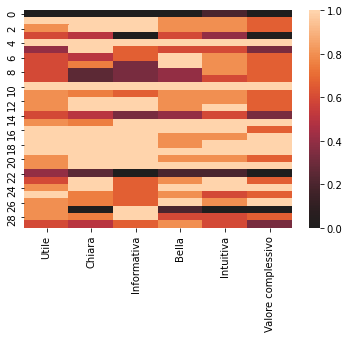

In [25]:
sns.heatmap(db_to_df,center=0)

In [26]:
corrMatrix = db_to_df.corr()
print(corrMatrix)

                       Utile    Chiara  ...  Intuitiva  Valore complessivo
Utile               1.000000  0.644055  ...   0.583671            0.691620
Chiara              0.644055  1.000000  ...   0.808268            0.702046
Informativa         0.779137  0.680823  ...   0.564606            0.632318
Bella               0.662733  0.794203  ...   0.843852            0.792744
Intuitiva           0.583671  0.808268  ...   1.000000            0.880290
Valore complessivo  0.691620  0.702046  ...   0.880290            1.000000

[6 rows x 6 columns]


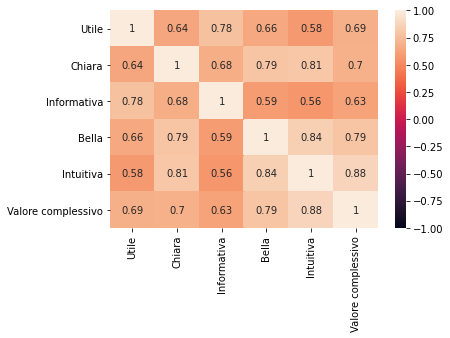

In [27]:
sns.heatmap(corrMatrix, cmap="rocket", vmin=-1, vmax=+1, annot=True)

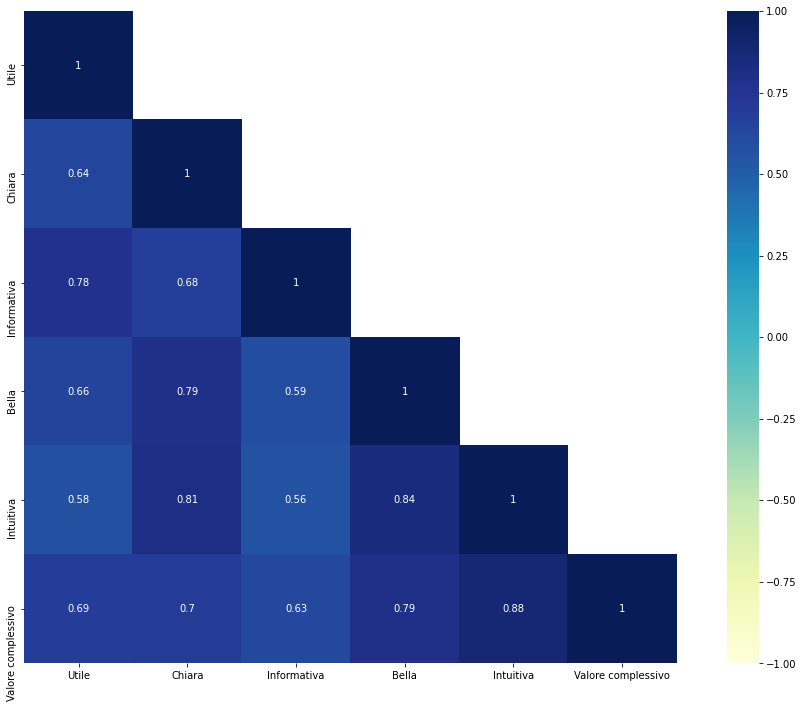

In [33]:
# https://numpy.org/doc/stable/reference/generated/numpy.tril.html
# Heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html
# color palette: https://seaborn.pydata.org/tutorial/color_palettes.html

mask = np.tril(np.ones(corrMatrix.shape)).astype(np.bool)


mask = np.ones((6, 6)) - mask
f, ax = plt.subplots(figsize=(18, 12))

# aggiungere ellisse tipo slide prof e cambiare colore 
ax = sns.heatmap(corrMatrix, mask=mask, square=True, cmap="YlGnBu", vmin=-1, vmax=+1, annot=True)

# save the visualization BEFORE (MUST) plotting
plt.savefig('corrplot.png', dpi=300)

# then show the viz
plt.show()